In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load the dta
data = pd.read_csv('/DataScienceNotes/Assignments/10-SVM/Pharma_Industry.csv')

#### Task 1: Exploratory Data Analysis (EDA) 

In [3]:
data.head()

,Drug Dosage (mg),Systolic Blood Pressure (mmHg),Heart Rate (BPM),Liver Toxicity Index (U/L),Blood Glucose Level (mg/dL),Drug Response
0,-0.128538,0.303280,-1.881849,0.258286,-0.792011,1
1,-1.846188,2.865142,-0.929511,2.866786,-0.719447,1
2,-1.252393,-1.541613,0.363632,-0.325370,0.191314,0
3,1.992515,-1.142779,-0.766657,0.975286,-0.823355,1
4,0.377100,0.538410,-0.029263,1.896015,-0.960130,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Drug Dosage (mg)                500 non-null    float64
 1   Systolic Blood Pressure (mmHg)  500 non-null    float64
 2   Heart Rate (BPM)                500 non-null    float64
 3   Liver Toxicity Index (U/L)      500 non-null    float64
 4   Blood Glucose Level (mg/dL)     500 non-null    float64
 5   Drug Response                   500 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 23.6 KB


In [5]:
# All columns are numerical

In [6]:
data.describe()

,Drug Dosage (mg),Systolic Blood Pressure (mmHg),Heart Rate (BPM),Liver Toxicity Index (U/L),Blood Glucose Level (mg/dL),Drug Response
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.0000
mean,-0.037761,0.214957,0.062871,0.054398,-0.171863,0.5200
std,0.979891,1.247567,0.971978,0.986001,0.983765,0.5001
min,-3.019512,-3.773897,-2.940389,-3.401277,-3.110431,0.0000
25%,-0.642003,-0.565168,-0.648157,-0.586085,-0.797715,0.0000
50%,-0.019340,0.201532,0.027732,-0.065661,-0.108106,1.0000
75%,0.641151,0.951375,0.710774,0.633914,0.513555,1.0000
max,2.949094,4.111751,3.193108,3.373269,2.518023,1.0000


##### mean is almost 0 and standard deviation is 1 so that sy it's prescaled 
##### and target variable drug response is balaced with 52% and 48%

In [7]:
data.isna().sum()

Drug Dosage (mg)                  0
Systolic Blood Pressure (mmHg)    0
Heart Rate (BPM)                  0
Liver Toxicity Index (U/L)        0
Blood Glucose Level (mg/dL)       0
Drug Response                     0
dtype: int64

##### NO missing values in the data set
##### looks data set is clean 

In [8]:
data['Drug Response'].unique()
# didn't find any placeholder other than null values

array([1, 0])

<Figure size 1200x800 with 0 Axes>

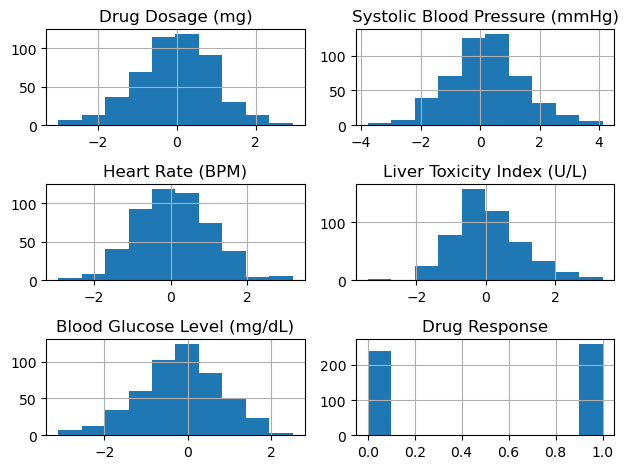

In [9]:
# plot histogram to visualize the distribution of the numerical features
plt.figure(figsize=(12, 8))
data.hist()
plt.tight_layout()
plt.show()

##### all features are almost normally distributed.
##### No skewnwees found in any features, SVM will well perform on this kind of data

<Figure size 600x300 with 0 Axes>

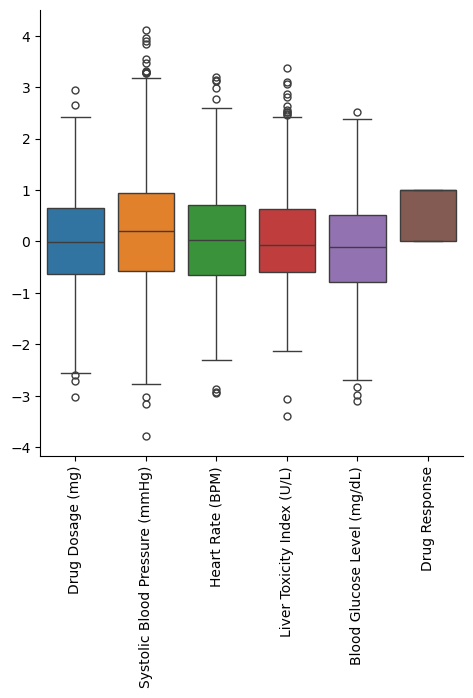

In [10]:
# finding outliers using boxplot
plt.figure(figsize=(6,3))
sns.catplot(data, kind='box')
plt.xticks(rotation=90)
plt.show()

##### some outliers are present that can be handeled by SVM 

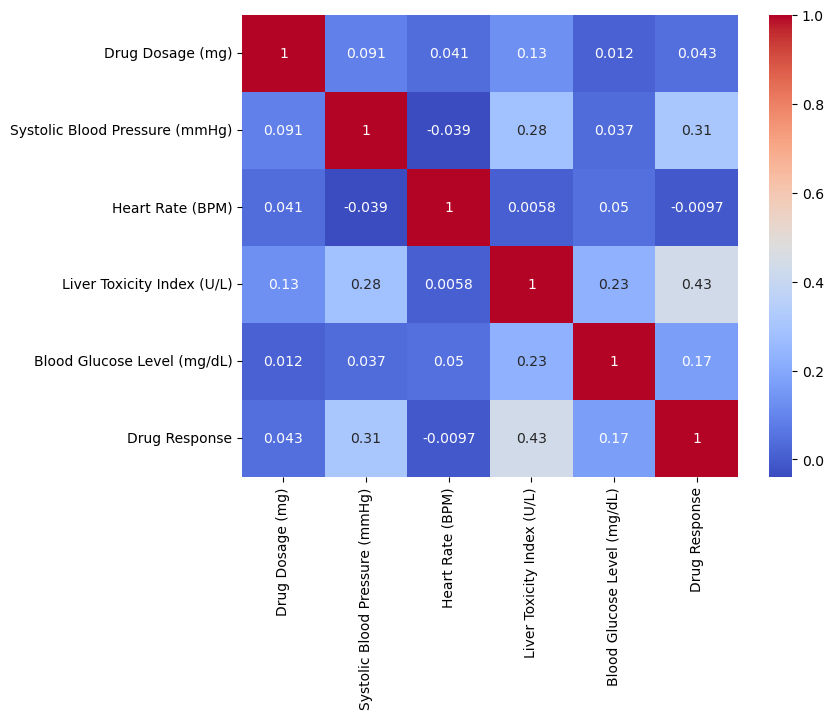

In [11]:
# find the correlation between the features and with traget variable
plt.figure(figsize=(8,6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.show()

##### didn't find any extremly high correlations, low multicolinarity 

#### Task 2: Data Preprocessing 

In [12]:
# set features and traget variable
X = data.drop("Drug Response", axis=1)
y = data["Drug Response"]

In [13]:
# split the data as traing and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape
# stratified split keeps class propertions intact

((400, 5), (100, 5), (400,), (100,))

#### Task 3: Data Visualization 

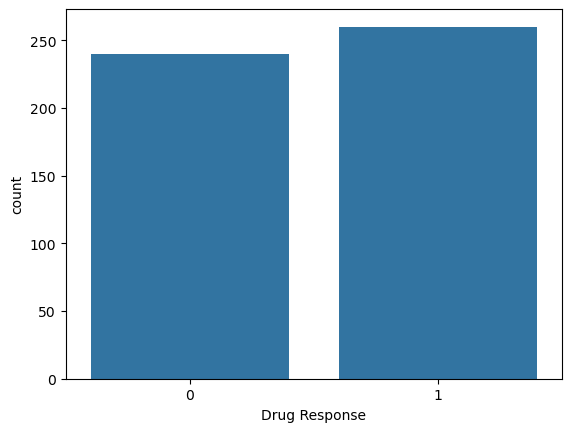

In [14]:
# checking class is balenced or not with visuals 
sns.countplot(x=y)
plt.show()
# finding class is balanced, not requierd any resampling.

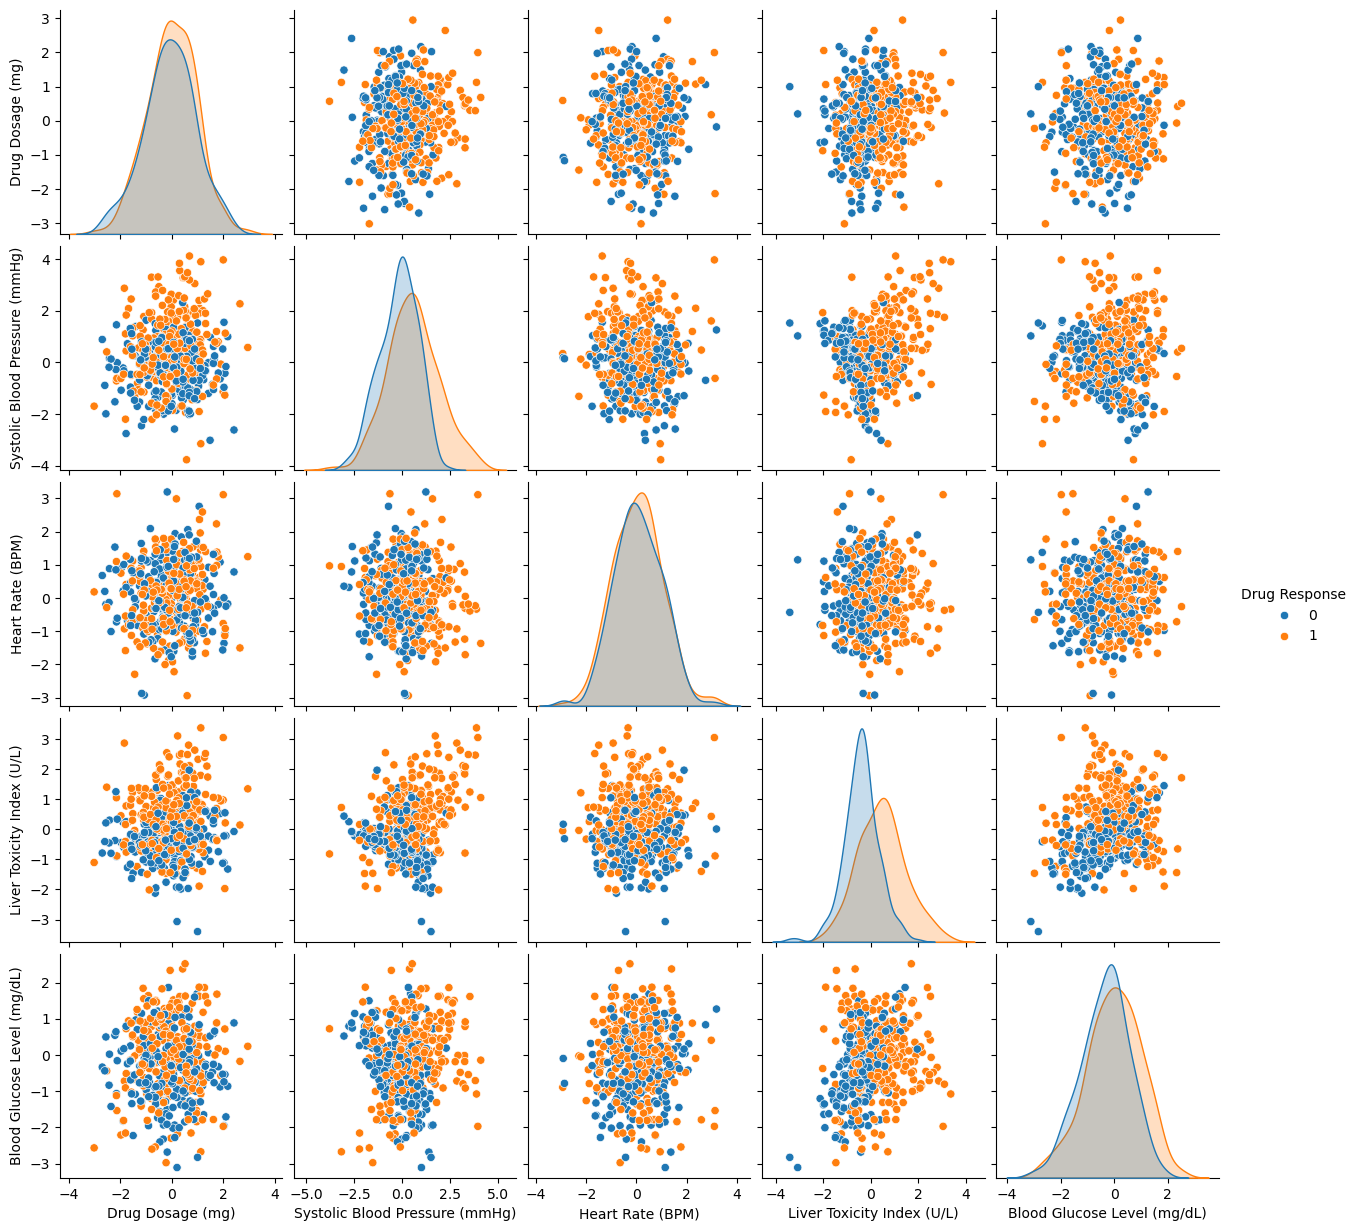

In [15]:
# visualize the relationship between the features 
# degree of overlap between classes
sns.pairplot(data, hue="Drug Response")
plt.show()

##### partial overlap between class, indicates non-linear boundries.

#### Task 4: SVM Implementation 

In [16]:
# build the model
from sklearn.svm import SVC
svm_linear = SVC(kernel="linear", random_state=42)
svm_linear.fit(X_train, y_train)

,C,1.0
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [17]:
# model evaluation
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
yhat_test = svm_linear.predict(X_test)
print(accuracy_score(y_test, yhat_test))
print(classification_report(y_test, yhat_test))

0.72
              precision    recall  f1-score   support

           0       0.69      0.77      0.73        48
           1       0.76      0.67      0.71        52

    accuracy                           0.72       100
   macro avg       0.72      0.72      0.72       100
weighted avg       0.72      0.72      0.72       100



##### indentifies patients who respond positively by recall.
##### balanced performance matric by f1-score

#### Task 5: Visualization of SVM Results 

In [18]:
# using two featrues
from sklearn.manifold import TSNE

In [19]:
tmodel = TSNE(n_components=2)
tcomps = tmodel.fit_transform(X, y)

In [20]:
# tcomps

<function matplotlib.pyplot.show(close=None, block=None)>

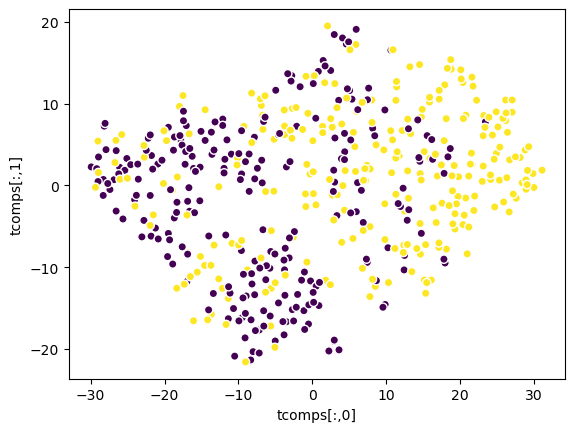

In [21]:
# visualize the drug response for resnoding and non responding 
plt.scatter(tcomps[:,0], tcomps[:,1], c=y, cmap='viridis', edgecolors='white')
plt.xlabel('tcomps[:,0]')
plt.ylabel('tcomps[:,1]')
plt.show

In [22]:
# visualization with different approch 
tsne = TSNE(
    n_components=2,      # Reduce to 2D
    perplexity=30,       # Controls local vs global structure
    random_state=42
)

X_tsne = tsne.fit_transform(X)


In [23]:
# create a data frame
tsne_df = pd.DataFrame({
    "TSNE_1": X_tsne[:, 0],
    "TSNE_2": X_tsne[:, 1],
    "Drug Response": y
})


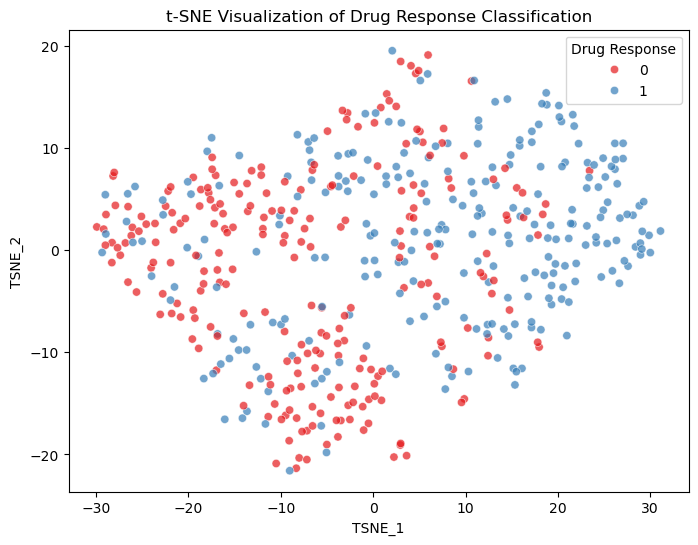

In [24]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=tsne_df,
    x="TSNE_1",
    y="TSNE_2",
    hue="Drug Response",
    palette="Set1",
    alpha=0.7
)
plt.title("t-SNE Visualization of Drug Response Classification")
plt.show()


#### Task 6: Parameter Tuning and Optimization 

In [25]:
from sklearn.model_selection import GridSearchCV

In [26]:
# tune the parameters 
param_grid = {
    "C" : [0.1, 1, 10],
    "kernel" : ["linear", "rbf", "poly"],
    "gamma" : ["scale", "auto"]
}

In [27]:
grid = GridSearchCV(SVC(), param_grid, cv=5, scoring="f1")

In [28]:
grid.fit(X_train, y_train)

,estimator,SVC()
,param_grid,"{'C': [0.1, 1, ...], 'gamma': ['scale', 'auto'], 'kernel': ['linear', 'rbf', ...]}"
,scoring,'f1'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,C,10


In [29]:
# finding the best parameters to build best model
grid.best_params_, grid.best_score_

({'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}, np.float64(0.7796554706594949))

In [30]:
# evaluate best model 
best_svm = grid.best_estimator_
y_best = best_svm.predict(X_test)

In [31]:
print(classification_report(y_test, y_best))

              precision    recall  f1-score   support

           0       0.73      0.67      0.70        48
           1       0.71      0.77      0.74        52

    accuracy                           0.72       100
   macro avg       0.72      0.72      0.72       100
weighted avg       0.72      0.72      0.72       100



In [32]:
# build the model with {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'} these parameter
svclf = SVC(C=10,gamma="auto", kernel='linear')
svclf.fit(X_train,y_train)

,C,10
,kernel,'linear'
,degree,3
,gamma,'auto'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [33]:
tr = svclf.predict(X_train)

In [34]:
ts = svclf.predict(X_test)

In [35]:
print(classification_report(y_train, tr))

              precision    recall  f1-score   support

           0       0.70      0.79      0.74       192
           1       0.78      0.69      0.73       208

    accuracy                           0.73       400
   macro avg       0.74      0.74      0.73       400
weighted avg       0.74      0.73      0.73       400



In [36]:
# check with confusion matrix
cm = confusion_matrix(y_train, tr)
cm

array([[151,  41],
       [ 65, 143]])

In [37]:
print(classification_report(y_test, ts))

              precision    recall  f1-score   support

           0       0.69      0.77      0.73        48
           1       0.76      0.67      0.71        52

    accuracy                           0.72       100
   macro avg       0.72      0.72      0.72       100
weighted avg       0.72      0.72      0.72       100



In [38]:
cm = confusion_matrix(y_test, yhat_test)
cm

array([[37, 11],
       [17, 35]])

#### Task 7: Comparison and Analysis 

#### Kernal performance comparision
##### Linear performance moderate, assumes linear separation
##### ploynomial performance little heavy mean risky, can overfit also
##### RBF performance best, handels complex biological patterns

#### Strengths os SVM
##### work well on standardized biomedical data
##### effective for hgh-dimensional decision boundries
##### suitable for drug response prediction
#### weakness
##### computationaly expensive for large data sets
##### hard to interpret clinically